<a href="https://colab.research.google.com/github/luciaemiliaeu/Enem2019/blob/main/Enem2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.patheffects as PathEffects
import matplotlib.patches as mpatches

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(fonte)
dados.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [2]:
dados.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Data columns (total 136 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NU_INSCRICAO                 127380 non-null  int64  
 1   NU_ANO                       127380 non-null  int64  
 2   CO_MUNICIPIO_RESIDENCIA      127380 non-null  int64  
 3   NO_MUNICIPIO_RESIDENCIA      127380 non-null  object 
 4   CO_UF_RESIDENCIA             127380 non-null  int64  
 5   SG_UF_RESIDENCIA             127380 non-null  object 
 6   NU_IDADE                     127380 non-null  int64  
 7   TP_SEXO                      127380 non-null  object 
 8   TP_ESTADO_CIVIL              127380 non-null  int64  
 9   TP_COR_RACA                  127380 non-null  int64  
 10  TP_NACIONALIDADE             127380 non-null  int64  
 11  CO_MUNICIPIO_NASCIMENTO      123757 non-null  float64
 12  NO_MUNICIPIO_NASCIMENTO      123757 non-null  object 
 13

In [3]:
cmap = plt.get_cmap("Set3")
def annotate_vertical(graph, rects):
  for rect in rects:
    height = rect.get_height()
    graph.annotate('{0:.2f}%'.format(height*100),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
    
def annotate_horizontal(graph, rects):
  for rect in rects:
    width = rect.get_width()
    graph.annotate('{0:.2f}%'.format(width*100),
                xy=( rect.get_x() + rect.get_width()/2, rect.get_y() + rect.get_height()/2),
                xytext=(-0.5, -0.5), color='w',
                textcoords="offset points")
    
def annotate_horizontal_absolute(graph, rects):
  for rect in rects:
    width = rect.get_width()
    graph.annotate('{}'.format(width),
                xy=( rect.get_x() + rect.get_width(), rect.get_y()+rect.get_height()/4 ),
                xytext=(1,0),
                textcoords="offset points")
        
def format_vertical(graph, labels, x):
  graph.set_xticks(x)
  graph.set_xticklabels(labels)
  graph.spines['right'].set_visible(False)
  graph.spines['top'].set_visible(False)
  graph.spines['left'].set_visible(False)
  graph.get_yaxis().set_visible(False)

def format_horizontal_bar(graph, labels, y):
  graph.set_yticks(y)
  graph.set_yticklabels(labels)
  graph.spines['right'].set_visible(False)
  graph.spines['top'].set_visible(False)
  graph.spines['bottom'].set_visible(False)
  graph.get_xaxis().set_visible(False)

In [4]:
censo_demografico_2010 = pd.read_excel('tab1_4.xls', header=4, index_col=0, na_filter=False, skipfooter=2)
censo_demografico_2010 = censo_demografico_2010['01.08.2010\n(3)']

In [5]:
regioes= {'AM': 'Norte', 'RR':'Norte', 'AP':'Norte', 'PA':'Norte', 'RO':'Norte',
          'TO':'Norte', 'AC':'Norte',
          'PI': 'Nordeste', 'MA':'Nordeste', 'CE':'Nordeste', 'RN':'Nordeste',
          'PE':'Nordeste', 'PB':'Nordeste', 'SE':'Nordeste', 'AL':'Nordeste',
          'BA':'Nordeste',
          'PR': 'Sul', 'RS':'Sul', 'SC':'Sul', 
          'SP': 'Sudeste', 'RJ':'Sudeste', 'ES':'Sudeste', 'MG':'Sudeste',
          'MT': 'Centro-Oeste', 'MS':'Centro-Oeste', 'GO':'Centro-Oeste', 'DF':'Centro-Oeste', 
          }
regioes_colors = {'Norte':1, 'Nordeste': 2, 'Sul': 3, 'Sudeste': 4, 'Centro-Oeste': 5}

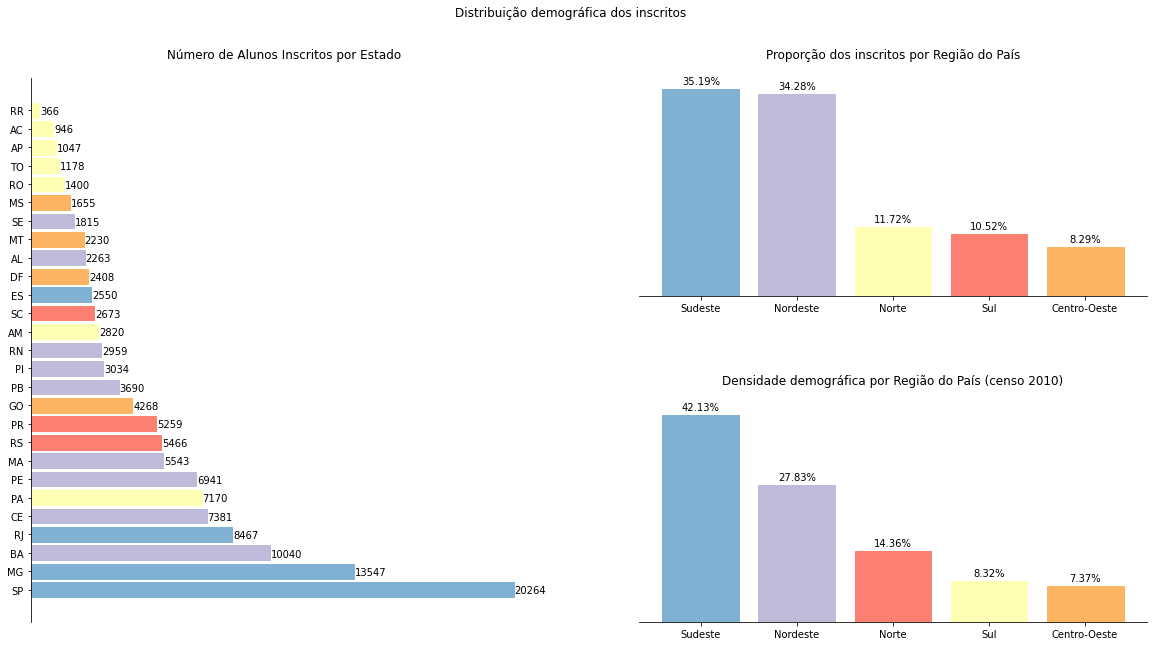

In [6]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Distribuição demográfica dos inscritos')
gspec = gridspec.GridSpec(2,2)
plt.subplots_adjust(hspace=0.5)

barChart_inscritos_por_estado = plt.subplot(gspec[0:,0])
num_inscritos_por_estado = dados['SG_UF_RESIDENCIA'].value_counts()
bars= barChart_inscritos_por_estado.barh(num_inscritos_por_estado.index, 
                                         num_inscritos_por_estado.values)
barChart_inscritos_por_estado.set_title('Número de Alunos Inscritos por Estado',
                                        pad=20)
format_horizontal_bar(barChart_inscritos_por_estado, 
                num_inscritos_por_estado.index , 
                np.arange(len(num_inscritos_por_estado)))
annotate_horizontal_absolute(barChart_inscritos_por_estado, bars)
for bar, estado in zip(bars, num_inscritos_por_estado.index):
  bar.set_color(cmap(regioes_colors[regioes[estado]]))

barChart_inscritos_por_regiao = plt.subplot(gspec[0,1])  
dados['Região'] = dados.apply(lambda x: regioes[x.SG_UF_RESIDENCIA], axis=1)
proporcao_inscritos_regiao = dados['Região'].value_counts(normalize=True)
bars = barChart_inscritos_por_regiao.bar(proporcao_inscritos_regiao.index, 
                                         proporcao_inscritos_regiao.values)
barChart_inscritos_por_regiao.set_title('Proporção dos inscritos por Região do País',
                                        pad=20)
format_vertical(barChart_inscritos_por_regiao, 
                proporcao_inscritos_regiao.index , 
                np.arange(len(proporcao_inscritos_regiao)))
annotate_vertical(barChart_inscritos_por_regiao, bars)
for bar, regiao in zip(bars, proporcao_inscritos_regiao.index):
  bar.set_color(cmap(regioes_colors[regiao]))

barChart_demografia_regiao = plt.subplot(gspec[1,1])
demografia_regiões = (censo_demografico_2010[['Norte', 'Nordeste', 'Sul', 'Sudeste', 'Centro-Oeste']]
                      .sort_values(ascending=False))
bars = barChart_demografia_regiao.bar(demografia_regiões.index,
                                      demografia_regiões.values/demografia_regiões.sum())
barChart_demografia_regiao.set_title('Densidade demográfica por Região do País (censo 2010)',
                                     pad=20)
format_vertical(barChart_demografia_regiao, 
                proporcao_inscritos_regiao.index , 
                np.arange(len(demografia_regiões)))
annotate_vertical(barChart_demografia_regiao, bars)
for bar, regiao in zip(bars, demografia_regiões.index):
  bar.set_color(cmap(regioes_colors[regiao]))

plt.show()

NameError: ignored

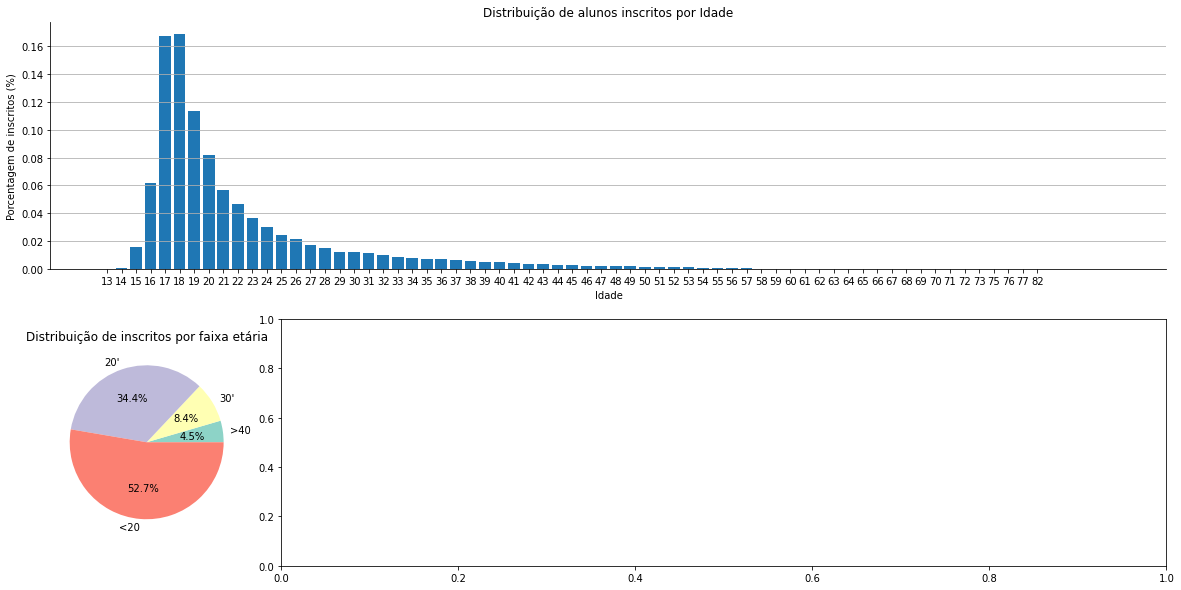

In [7]:
fig = plt.figure(figsize=(20,10))
gspec = gridspec.GridSpec(4,5)
plt.subplots_adjust(hspace=0.5)

#Plotagem da proporção de inscritos por idade
idade = dados['NU_IDADE'].value_counts().sort_index()
proporcao = dados['NU_IDADE'].value_counts(normalize=True).sort_index()
top_histogram = plt.subplot(gspec[0:2,0:])
top_histogram.bar(proporcao.index, proporcao.values)
top_histogram.set_xticks(range(proporcao.index.min(),proporcao.index.min()+ len(proporcao)))
top_histogram.set_xticklabels(proporcao.index)
top_histogram.set_ylabel('Porcentagem de inscritos (%)')
top_histogram.set_xlabel('Idade')
top_histogram.spines['right'].set_visible(False)
top_histogram.spines['top'].set_visible(False)
top_histogram.grid(axis='y')
top_histogram.set_title('Distribuição de alunos inscritos por Idade')

#Plotagem do gráfico de pizza com a porcentagem de inscritos por faixa etária
side_pieChart = plt.subplot(gspec[2:,0])
def faixa(x):
  if x >=13 and x <=19: return "<20"
  elif x <=29: return "20'"
  elif x <=39: return "30'"
  else: return ">40"

proporcao_2 = pd.DataFrame(idade)
proporcao_2['Rate_NU_IDADE'] = proporcao_2['NU_IDADE']*0.01
proporcao_2['Idade'] = proporcao_2.index
proporcao_2 = proporcao_2.reset_index(drop=True)
proporcao_2['FaixaEtaria'] = proporcao_2.apply(lambda x: faixa(x.Idade), axis=1)
faixaEtaria = proporcao_2.groupby('FaixaEtaria').agg("sum").sort_values(by='Rate_NU_IDADE')
side_pieChart.pie(faixaEtaria['Rate_NU_IDADE'], autopct='%1.1f%%', labels= faixaEtaria.index, colors = cmap(np.arange(4)))
side_pieChart.set_title('Distribuição de inscritos por faixa etária')

#Plotagem do gráfico de barras dividido por faixa etária
def decada(x):
  if x <=49: return "40'"
  elif x <=59: return "50'"
  elif x <=69: return "60'"
  elif x <=79: return "70'"
  else: return "80'"

barChart_faixaEtaria = plt.subplot(gspec[2:,1:])
colors = ['Reds', 'Greens', 'Oranges', 'Blues']
for faixa, color in zip(proporcao_2['FaixaEtaria'].unique(), colors):
  c = plt.get_cmap(color)
  bottom = 0
  if faixa !=  ">40":
    proporcao_3 = proporcao_2[proporcao_2['FaixaEtaria'] == faixa].set_index("Idade", drop=True).T.drop(['FaixaEtaria', 'Rate_NU_IDADE'])
    for column, cl in zip(proporcao_3.columns, range(len(proporcao_3.columns))):
      height = proporcao_3[column]['NU_IDADE']
      barChart_faixaEtaria.barh(faixa, width=height, label='{}: {}'.format(column,height), left=bottom, color=chartBar_raca(0.1*cl+0.4), edgecolor='w')
      bottom += proporcao_3[column]
  else:
    proporcao_3 = proporcao_2.loc[proporcao_2[proporcao_2['FaixaEtaria'] == faixa].index]
    proporcao_3['Decada_Idade'] = proporcao_2.apply(lambda x: decada(x.Idade), axis=1)
    proporcao_3 = proporcao_3.groupby('Decada_Idade').agg("sum").T.drop(['Rate_NU_IDADE', 'Idade']).rename(index={'NU_IDADE':">40"})
    for column, cl in zip(proporcao_3.columns, range(len(proporcao_3.columns))):
      height = proporcao_3[column].to_numpy()[0]
      barChart_faixaEtaria.barh(">40", width=height, label='{}: {}'.format(column,height), left=bottom, color=c(0.1*cl+0.4), edgecolor='w')
      bottom += proporcao_3[column]

barChart_faixaEtaria.legend( bbox_to_anchor=(0.5,-0.43), loc='lower center', borderaxespad=0., ncol=10)
barChart_faixaEtaria.spines['right'].set_visible(False)
barChart_faixaEtaria.spines['top'].set_visible(False)
barChart_faixaEtaria.spines['left'].set_visible(False)
barChart_faixaEtaria.set_xlabel('Quantidade de inscritos')
plt.show()


# Análise dos incritos com menos de 17 anos de idade
Inscritos com essa faixa etária (13-17 anos), na teoria, não deveriam estar prestando vestibular, uma vez que espera-se que estes alunos não estejam concluindo o ensino médio, entretanto eles representam 7.84% do número total de inscritos. Isso levanta questionamentos sobre o perfil desses alunos.

In [ ]:
dados['Menor_17'] = dados.apply(lambda x: x.NU_IDADE<17, axis=1)
alunos_menores_17 = dados[dados['Menor_17']]



## Distribuição geográfica

A distrubuição dos inscritos menores de 17 anos por região do país (1) apresenta distribuição similar a de inscritos totais, vide o gráfico da primeira célula. Ou seja, em relação as regiões, a distribuição desse alunos segue conforme o esperado, o que pode ser confirmado pela proporção de inscritos com menos de 17 anos em cada região (2), cuja variação é de apenas 2.57 pontos percentuais.

Em relação aos estados (3), o Tocantins é o estado com maior proporção de inscritos com menos de 17 anos. Esse resultado pode ser explicado pelo fato do estado ser o 4º com menos inscritos de maneira geral, logo, uma menor quantidade de inscritos com menos de 17 anos seria o suficiente para aumentar a proporção.
Chama a atenção a diferença em relação aos demais estados do Norte: tanto os com mais inscritos (PA, RO e AM), quanto os com menor número de inscritos (RR, AC e AP), apresentam proporções bem menores de inscritos com menos de 17 anos, destacando o resultado do Tocantins.

Dos 10 estados com maior propoção de inscritos com menos de 17 anos, podemos destacar os estados do Nordeste, que ocupam 5 postos, e o Centro-Oeste, com 3 dos seus 4 estados.


In [ ]:
fig = plt.figure(figsize=(20,8))
gspec = gridspec.GridSpec(2,2)
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Análise dos inscritos menores de 17 anos: Distribuição geográfica')

#Plotagem da distribuição de inscritos menores de 17 anos por região
barChart_distribuicao_regiao = plt.subplot(gspec[0,0])
distribuicao_alunos_menores_por_regiao = alunos_menores_17['Região'].value_counts(normalize=True)
bars = barChart_distribuicao_regiao.bar(distribuicao_alunos_menores_por_regiao.index,
                                        distribuicao_alunos_menores_por_regiao)
barChart_distribuicao_regiao.set_title('1 - Distribuição de inscritos menores de 17 anos por Região',
                           pad=20)
format_vertical(barChart_distribuicao_regiao, 
                distribuicao_alunos_menores_por_regiao.index, 
                barChart_distribuicao_regiao.get_xticks())
annotate_vertical(barChart_distribuicao_regiao, bars)
for bar, regiao in zip(bars, distribuicao_alunos_menores_por_regiao.index):
  bar.set_color(cmap(regioes_colors[regiao]))

#Plotagem da proporção inscritos menores de 17 anos por região
barChart_regiao = plt.subplot(gspec[0,1])
proporcao_alunos_menores_por_regiao = (alunos_menores_17['Região'].value_counts().sort_index() /
                                       dados['Região'].value_counts().sort_index())
proporcao_alunos_menores_por_regiao = proporcao_alunos_menores_por_regiao.sort_values(ascending=False)
bars = barChart_regiao.bar(proporcao_alunos_menores_por_regiao.index,
                           proporcao_alunos_menores_por_regiao.values)
barChart_regiao.set_title('2 - Proporção de inscritos menores de 17 anos por Região',
                           pad=20)
format_vertical(barChart_regiao, 
                proporcao_alunos_menores_por_regiao.index , 
                np.arange(len(proporcao_alunos_menores_por_regiao)))
annotate_vertical(barChart_regiao, bars)
for bar, regiao in zip(bars, distribuicao_alunos_menores_por_regiao.index):
  bar.set_color(cmap(regioes_colors[regiao]))

#Plotagem de inscritos menores de 17 anos por estado
barChart_estados = plt.subplot(gspec[1,0:])
proporcao_alunos_menores_por_estado = (alunos_menores_17['SG_UF_RESIDENCIA'].value_counts().sort_index()/
                                       num_inscritos_por_estado.sort_index())
proporcao_alunos_menores_por_estado = proporcao_alunos_menores_por_estado.sort_values(ascending=False)
bars = barChart_estados.bar(proporcao_alunos_menores_por_estado.index, 
                            proporcao_alunos_menores_por_estado.values, width=0.75 ) 
barChart_estados.set_title('3 - Proporção de inscritos menores de 17 anos por Estado',
                           pad=20)
format_vertical(barChart_estados, 
                proporcao_alunos_menores_por_estado.index , 
                np.arange(len(proporcao_alunos_menores_por_estado)))
annotate_vertical(barChart_estados, bars)
for bar, estado in zip(bars,proporcao_alunos_menores_por_estado.index):
  bar.set_color(cmap(regioes_colors[regioes[estado]]))

plt.show()


## Perfil Social
Os seguintes dados foram analisados no perfil social: Sexo, Raça, Rede de Ensino no qual o inscrito concluiu/concluirá o ensino médio, a Localidade dessa instituição (se urbana ou rural) e a Renda familiar do inscrito. 

Seguindo a mesma lógica da análise demográfica, comparamos as proporções dos inscrito em cada 


In [ ]:
atendimento_esp = ['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 
                   'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
                   'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO',
                   'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF']

dados_sociais = ['TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'TP_LOCALIZACAO_ESC',  
                 'Q006', 'Q008', 'Q010', 'Q011']
#Q006 : renda familiar 
#Q010 : carro
#Q011: moto
#Q008 : sanitário

acesso_tech = ['Q019', 'Q020', 'Q021', 'Q022', 'Q024', 'Q025']
# tv, dvd, tv por assinatura, celular, computador, internet
renda = {'A': '0', 'B':']0, 1]', 'C': ']1, 1.5]', 'D': ']1.5, 2]',
         'E':']2, 2.5]', 'F':']2.5, 3]', 'G': ']3, 4]', 'H': ']4, 5]',
         'I':']5, 6]', 'J':']6, 7]', 'K': ']7, 8]', 'L': ']8, 9]',
         'M':']9, 10]', 'N':']10, 12]', 'O': ']12, 15]', 'P': ']15, 20]',
         'Q': '>20',}

In [ ]:
fig = plt.figure(figsize=(20,8))
gspec = gridspec.GridSpec(3,5)
plt.subplots_adjust(hspace=0.8, top=0.8)
fig.suptitle('Análise dos inscritos menores de 17 anos: Distribuição Socio-econômica')

# Plotagem do gráfico de proporção do sexo
sexo_17 = alunos_menores_17['TP_SEXO'].value_counts(normalize=True).sort_index()
sexo_total = dados['TP_SEXO'].value_counts(normalize=True).sort_index()

chartBar_sexo = plt.subplot(gspec[0,0])
chartBar_sexo.pie(sexo_17, radius=1,
                  labels= ['Feminino\n    {0:.2f}%'.format(sexo_17['F']*100),
                           'Masculino\n    {0:.2f}%'.format(sexo_17['M']*100)],
                  colors= cmap(np.arange(2)*6), wedgeprops=dict(width=0.3, edgecolor='w'))
chartBar_sexo.pie(sexo_total, radius=0.7, wedgeprops=dict(width=0.3, edgecolor='w', alpha=0.6),
                  colors=cmap(np.arange(2)*6))
chartBar_sexo.set_title('Proporção de inscritos por sexo', pad=20)
chartBar_sexo.set(aspect='equal')

# Plotagem do gráfico de proporção por raça
raca_17 = alunos_menores_17['TP_COR_RACA'].value_counts(normalize=True)
raca_total = dados['TP_COR_RACA'].value_counts(normalize=True)
#print(raca_total)

chartBar_raca = plt.subplot(gspec[0,1:3])
x = np.arange(len(raca_17)) 
chartBar_raca.bar(x-0.25, raca_total, color='w', edgecolor=cmap(x+2), width=0.5)
chartBar_raca.set_ylim(0,1)
rects1 = chartBar_raca.bar(x, raca_17, color=cmap(x+2), width=0.5)

chartBar_raca.set_title('Proporção de inscritos por Raça')
labels = {0:'Não declarado', 1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena'}
format_vertical(chartBar_raca, list(map(labels.get, raca_17.index)), x)
annotate_vertical(chartBar_raca, rects1)

#Plotagem da proporção por rede de ensino
esco_17 = alunos_menores_17['TP_ESCOLA'].value_counts(normalize=True).sort_index()
esco_total = dados['TP_ESCOLA'].value_counts(normalize=True).sort_index()

chartBar_esc = plt.subplot(gspec[0,3])
x = np.arange(len(esco_17))
chartBar_esc.bar(x-0.15, esco_total, color='w', edgecolor=cmap(x+6), width=0.3)
rects2 = chartBar_esc.bar(x, esco_17.values, width=0.3,color=cmap(x+6))

chartBar_esc.set_title('Proporção de inscritos \n por rede de ensino', pad=20)
chartBar_esc.set_ylim(0,1)
labels = {1: 'Não informou', 2:'Pública', 3:'Privada'}
format_vertical(chartBar_esc, list(map(labels.get, esco_17.index)), x)
annotate_vertical(chartBar_esc, rects2)

#Plotagem da proporção por localização
loc_esco_17 = alunos_menores_17['TP_LOCALIZACAO_ESC'].value_counts(normalize=True).sort_index()
loc_esco_total = dados['TP_LOCALIZACAO_ESC'].value_counts(normalize=True).sort_index()

chartBar_loc_esc = plt.subplot(gspec[0,4])
x = np.arange(len(loc_esco_17))
chartBar_loc_esc.bar(x-0.15, loc_esco_total, color='w', edgecolor=cmap(x+2), width=0.3)
rects3 = chartBar_loc_esc.bar(x, loc_esco_17.values, width=0.3, color=cmap(x+2) )

chartBar_loc_esc.set_title('Proporção de inscritos \n por localidade', pad=20)
chartBar_loc_esc.set_ylim(0,1)
labels = {1:'Urbana', 2:'Rural'}
format_vertical(chartBar_loc_esc, list(map(labels.get, loc_esco_17.index)), x)
annotate_vertical(chartBar_loc_esc, rects3)

# Plotagem do histograma de renda
renda_17 = alunos_menores_17['Q006'].sort_values()
renda_total = dados['Q006'].sort_values()

hist_renda = plt.subplot(gspec[1:,0:])
hist_renda.hist(renda_17, bins=17, align='mid', color=cmap(3), label='Menores de 17 anos')
hist_renda.hist(renda_total, bins=17, align='mid',
                histtype='step', color=cmap(3), label='Amostra total')
hist_renda.set_title('Distrbuição de inscritos por Renda')

x = np.arange(len(renda_17.value_counts().index))
labels = renda_17.value_counts().sort_index().index
format_vertical(hist_renda, list(map(renda.get, labels)), x)
hist_renda.set_xlabel('Número de salários mínimos na família')

colored_patch = mpatches.Patch(color=plt.get_cmap("Set1")(8), label='Menores de 17 anos')
not_colored_patch = mpatches.Patch(edgecolor=plt.get_cmap("Set1")(8), facecolor='w', label='Amostra total')
plt.legend(handles=[colored_patch,not_colored_patch ], loc='upper center', bbox_to_anchor=(0.5, -0.35), fancybox=True, ncol=2, fontsize='large')
plt.show()

In [ ]:
dados['IN_TREINEIRO']
treineiros = dados.loc[dados[dados['IN_TREINEIRO']==1].index].index
fig = plt.figure(figsize=(20,10))
fig.suptitle('Comparação entre Treineiros e Não treineiros')
gspec = gridspec.GridSpec(2,4)
plt.subplots_adjust(hspace=0.3)

#Plotagem da proporção de inscritos treineiros por idade
top_histogram = plt.subplot(gspec[0,0:])
idade_treineiros = dados.loc[treineiros]['NU_IDADE'].value_counts().sort_index()
idade_nao_treineiros = dados.drop(index=treineiros)['NU_IDADE'].value_counts().sort_index()
proporcao_nao_treineiros = (idade_nao_treineiros / dados.shape[0] )*100
proporcao_treineiros = (idade_treineiros / dados.shape[0])*100
repetido = proporcao_treineiros.index.intersection(proporcao_nao_treineiros.index)

top_histogram.bar(proporcao_nao_treineiros.loc[repetido].index, 
                  proporcao_nao_treineiros.loc[repetido].values, 
                  label='Não Treineiros', color='b')
top_histogram.bar(proporcao_nao_treineiros.drop(index=repetido).index, 
                  proporcao_nao_treineiros.drop(index=repetido).values,
                  color='b')
top_histogram.bar(proporcao_treineiros.loc[repetido].index, 
                  proporcao_treineiros.loc[repetido].values, 
                  bottom = proporcao_nao_treineiros.loc[repetido].values, 
                  label='Treineiros', color='orange')
top_histogram.bar(proporcao_treineiros.drop(index=repetido).index,
                  proporcao_treineiros.drop(index=repetido).values,
                  color='orange')
for i in repetido:
  if proporcao_treineiros.loc[i]>0.01:
    height = proporcao_treineiros.loc[i] + proporcao_nao_treineiros.loc[i]
    if i in [15,19,21,23]: height += 0.3
    elif i == 18 : height += 0.8
    pct = (proporcao_treineiros.loc[i]/ height) * 100
    text = (top_histogram
            .text(i-1,height+0.3,'{0:0.2f}%'.format(pct), color='orange', fontweight = 'bold' )
            .set_path_effects([PathEffects.withStroke(linewidth=3, foreground='w')]))

proporcao = dados['NU_IDADE'].value_counts(normalize=True).sort_index()
top_histogram.set_xticks(range(proporcao.index.min(),proporcao.index.min()+ len(proporcao)))
top_histogram.set_xticklabels(proporcao.index)
top_histogram.set_ylabel('Porcentagem de inscritos (%)')
top_histogram.set_xlabel('Idade')
top_histogram.spines['right'].set_visible(False)
top_histogram.spines['top'].set_visible(False)
top_histogram.grid(axis='y')
top_histogram.legend()
top_histogram.set_title('Taxa de inscritos treineiros por idade')

# Plotagem do gráfico de comparação entre o total de treineiros e não treineiros
sideChatL = plt.subplot(gspec[1,0])
sideChatL.bar(0, dados.drop(index=treineiros).shape[0], )
sideChatL.bar(0, len(treineiros), 
              bottom=dados.drop(index=treineiros).shape[0])

sideChatL.text(-0.025, dados.drop(index=treineiros).shape[0]/2, 
               '{0:.2f}%'.format(dados.drop(index=treineiros).shape[0]/dados.shape[0]*100),
               fontweight = 'bold', color='w' )
sideChatL.text(-0.025, dados.drop(index=treineiros).shape[0] + len(treineiros)/2,
               '{0:.2f}%'.format(len(treineiros)/dados.shape[0]*100), 
               fontweight = 'bold', color='w' )

sideChatL.set_title('Proporcão entre Treineiros e Não treineiros')
sideChatL.spines['right'].set_visible(False)
sideChatL.spines['top'].set_visible(False)
sideChatL.spines['left'].set_visible(False)
sideChatL.get_yaxis().set_visible(False)
sideChatL.get_xaxis().set_visible(False)


#Plotagem do gráfio de comparação do desempenhos de treineiros e não treineiros por área
provas =  ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
desempenho_media = (dados
              .groupby("IN_TREINEIRO")
              .agg("mean")[provas])
desempenho_std = (dados
              .groupby("IN_TREINEIRO")
              .agg("std")[provas])
sideChartH = plt.subplot(gspec[1,2:])
labels = ['Ciências Naturais', 'Ciências Humanas', 'Linguagens', 'Matemática', 'Redação']
y = np.arange(len(labels))
lenght = 0.40

rects1 = sideChartH.barh(y-lenght/2, desempenho_media.loc[0], lenght, 
                         label='Não treineiros', color = 'b', xerr=desempenho_std.loc[0])
rects2 = sideChartH.barh(y+lenght/2, desempenho_media.loc[1], lenght, 
                         label='Treineiros', color='orange', xerr=desempenho_std.loc[1])

def label(rects, ypos='center'):
  offset = {'center': 0, 'top': 2, 'bottom': -2}

  for rect in rects:
    width = rect.get_width()
    sideChartH.annotate('{0:.2f}'.format(width),
                        xy=(width, rect.get_y()+0.1),
                        xytext=(3, offset[ypos]*3),
                        textcoords="offset points")
label(rects1, 'bottom')
label(rects2, 'top')

sideChartH.set_title('Desempenho de Treineiros e Não Treineiros por área de concentração')
sideChartH.spines['right'].set_visible(False)
sideChartH.spines['top'].set_visible(False)
sideChartH.set_yticks(y)
sideChartH.set_yticklabels(labels)
sideChartH.set_xlabel('Nota')

plt.show()


In [ ]:
provas =  ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
desempenho_medio_menores_17 = alunos_menores_17[provas].sum(axis=1)/5
desempenho_medio_menores_17 = desempenho_medio_menores_17.where(desempenho_medio_menores_17>0.0).dropna()
desempenho_medio_total = dados[provas].sum(axis=1)/5
desempenho_medio_total = desempenho_medio_total.where(desempenho_medio_total>0.0).dropna()


hist_desempenho.hist(desempenho_medio_menores_17, bins=50, alpha=0.5)
hist_desempenho.axvline(x=desempenho_medio_total.mean(), ymax=500, color='green', label='Média Nacional')
hist_desempenho.axvline(x=desempenho_medio_menores_17.mean(), ymax=500, color='orange', label='Média de alunos menores de 17 anos')
hist_desempenho.annotate('{0:.2f}'.format(desempenho_medio_menores_17.mean()), xy=(desempenho_medio_menores_17.mean(), 500),
                         xytext=(5, 40),textcoords="offset points", color='orange')
hist_desempenho.annotate('{0:.2f}'.format(desempenho_medio_total.mean()), xy=(desempenho_medio_total.mean(), 500),
                         xytext=(-40, 40),textcoords="offset points", color='green')

hist_desempenho.legend()
hist_desempenho.spines['right'].set_visible(False)
hist_desempenho.spines['top'].set_visible(False)
hist_desempenho.spines['left'].set_visible(False)
hist_desempenho.get_yaxis().set_visible(False)
hist_desempenho.set_xlabel('Nota Média')
hist_desempenho.set_title('Distribuição do desempenho médio de alunos menores de 17 anos', pad=20)

# Análises textuais
presenca = ['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT']
alunos_faltantes = dados[(dados[presenca]==0).any(axis=1)]
alunos_menores_17_faltantes = alunos_faltantes[(alunos_faltantes['NU_IDADE']<17)]

alunos_desistentes = dados[(dados[presenca]==0).all(axis=1)]
alunos_menores_17_desistentes = alunos_desistentes[(alunos_desistentes['NU_IDADE']<17)]

print('{0:.2f}% dos inscritos menores de 17 não compareceram a pelo menos uma prova, representando {1:.2f}% do número total de alunos faltantes.'
.format(alunos_menores_17_faltantes.shape[0]/alunos_menores_17.shape[0]*100, 
        alunos_menores_17_faltantes.shape[0]/alunos_faltantes.shape[0]*100))

print('{0:.2f}% dos inscritos menores de 17 não compareceram a nenhum dia de prova, representando {1:.2f}% do número total de alunos desistentes.'
.format(alunos_menores_17_desistentes.shape[0]/alunos_menores_17.shape[0]*100,
        alunos_menores_17_desistentes.shape[0]/alunos_desistentes.shape[0]*100))
menores_17_treineiros = alunos_menores_17[alunos_menores_17['IN_TREINEIRO']==1]
print('{0:.2f}% dos inscritos menores de 17 anos são treineiros.'.format(menores_17_treineiros.shape[0]/alunos_menores_17.shape[0]*100))

menores_17_melhores_media = desempenho_medio_menores_17.where(desempenho_medio_menores_17 > desempenho_medio_total.mean()).dropna()
print('{0:.2f}% dos inscritos menores de 17 anos tiram notas maiores que a média nacional.'.format(len(menores_17_melhores_media)/alunos_menores_17.shape[0] *100 ))
